In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
path='./data/'

users = pd.read_csv('processed_users_2.csv')
books = pd.read_csv('basic_preprocess_books.csv')
ratings = pd.read_csv(path+'train_ratings.csv')
title_label_data = pd.read_csv('isbn_title_dataset.csv')

In [103]:
for cat, cnt in books['category_high'].value_counts().to_dict().items():
    print(cat, cnt)

fiction 39678
others 4136
biography & autobiography 3335
history 1949
religion 1824
nonfiction 1427
humor 1291
social 1271
business 1146
cook 1125
body, mind & spirit 1113
science 1063
family 988
health & fitness 971
literary 848
computer 806
language 804
poetry 740
psycholog 729
travel 672
self-help 640
art 563
drama 537
children 525
philosophy 491
nature 490
reference 471
performing arts 457
sports & recreation 446
comics & graphic novels 422
crafts 413
music 365
education 339
true crime 336
pets 306
garden 294
detective and mystery stories 257
medical 243
animal 225
adventure 208
house 203
photograph 175
literature 174
technology & engineering 161
christian 138
architect 129
games & activities 128
science fiction 128
games 125
law 104
india 98
antiques & collectibles 97
friendship 84
brothers and sisters 84
cats 83
motion picture 76
mathemat 73
families 71
bible 67
england 65
australia 64
fantasy 63
adolescence 62
design 62
great britain 56
fairy tales 53
authors, american 52
africa

In [105]:
gt_test_data = books[(books['category_high']=='fiction') | (books['category_high']=='nonfiction')]
pred_fiction_data = title_label_data[['isbn','label']]

In [106]:
pred_fiction_data['label'] = pred_fiction_data['label'].apply(lambda x: x.lower())

/tmp/ipykernel_62155/1279227253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_fiction_data['label'] = pred_fiction_data['label'].apply(lambda x: x.lower())


In [107]:
gt_test_data.drop(['Unnamed: 0'], axis=1, inplace=True)

/tmp/ipykernel_62155/2213006294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_test_data.drop(['Unnamed: 0'], axis=1, inplace=True)


In [108]:
pred_fiction_data.sample(3)

,isbn,label
25715,055312997X,fiction
16151,0439083699,fiction
86243,0671036068,fiction


In [109]:
gt_test_data.sample(1)

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,summary,img_path,category_high
58849,0312874219,The Pickup Artist,Terry Bisson,2002.0,Tor Books,http://images.amazon.com/images/P/0312874219.0...,en,From the author of Pirates of the Universe com...,images/0312874219.01.THUMBZZZ.jpg,fiction


In [110]:
gt_test_data.loc[gt_test_data['category_high'] != 'fiction', 'category_high'] = 'non-fiction'

In [111]:
gt_test_data.sample(3)

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,summary,img_path,category_high
74736,0515135968,Shadow Game,Christine Feehan,2003.0,Jove Books,http://images.amazon.com/images/P/0515135968.0...,en,From the &quot;New York Times&quot; bestsellin...,images/0515135968.01.THUMBZZZ.jpg,fiction
19957,0395833620,Jubilee (Literature Connections),Margaret Walker,1997.0,Houghton Mifflin School,http://images.amazon.com/images/P/0395833620.0...,en,"Here is the classic--and true--story of Vyry, ...",images/0395833620.01.THUMBZZZ.jpg,non-fiction
72821,1568490739,The Anastasia Syndrome and Other Stories,Mary Higgins Clark,1991.0,Buccaneer Books Inc,http://images.amazon.com/images/P/1568490739.0...,en,The remaining four stories in the collection a...,images/1568490739.01.THUMBZZZ.jpg,fiction


In [112]:
gt_test_data = gt_test_data[['isbn','category_high']]
gt_test_data

,isbn,category_high
3,0399135782,fiction
6,074322678X,fiction
7,0771074670,fiction
13,1881320189,fiction
14,0440234743,fiction
...,...,...
149532,0821726595,fiction
149556,1896095186,fiction
149559,0449225208,fiction
149563,0689818904,fiction


In [113]:
gt_test_data.sample(1)

,isbn,category_high
91336,0064401766,fiction


In [114]:
pred_fiction_data.sample(1)

,isbn,label
119335,073226491X,fiction


In [115]:
merge = gt_test_data.merge(pred_fiction_data, how='left', on='isbn')
ground_true = merge['category_high']
pred = merge['label']

In [116]:
ground_true

0        fiction
1        fiction
2        fiction
3        fiction
4        fiction
          ...   
41100    fiction
41101    fiction
41102    fiction
41103    fiction
41104    fiction
Name: category_high, Length: 41105, dtype: object

In [117]:
pred

0            fiction
1            fiction
2        non-fiction
3            fiction
4            fiction
            ...     
41100        fiction
41101    non-fiction
41102        fiction
41103        fiction
41104        fiction
Name: label, Length: 41105, dtype: object

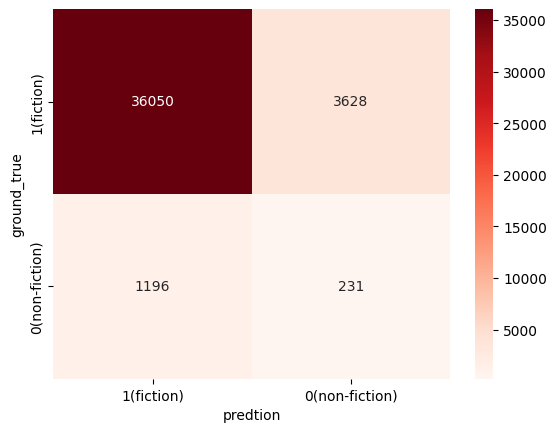

In [118]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ground_true, pred)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('predtion')
plt.ylabel('ground_true')
plt.xticks([0.5,1.5],['1(fiction)', '0(non-fiction)'])
plt.yticks([0.5,1.5],['1(fiction)', '0(non-fiction)'])
plt.show()

In [11]:
list(pred_fiction_data[pred_fiction_data['isbn'] == '0671870432']['label'])

['non-fiction']

In [12]:
import tqdm
import time

In [13]:
for idx,isbn in tqdm.tqdm(enumerate(fiction_data_isbn)):
    if list(pred_fiction_data[pred_fiction_data['isbn'] == isbn]['label'])[0] == 'fiction':
        cnt_true += 1

39678it [07:06, 93.13it/s]


In [14]:
acc = cnt_true / len(fiction_data_isbn)
print(acc * 100)

90.85639397147034


In [65]:
def cat2num(s:str):
    return 1 if s == 'fiction' else 0

In [66]:
y_true = gt_fiction_data['category_high'].apply(lambda x: cat2num(x)).values
y_true

array([1, 1, 1, ..., 1, 1, 1])

In [67]:
len(y_true)

39678

In [73]:
merge = gt_fiction_data.merge(pred_fiction_data, how='left', on='isbn')

In [78]:
ground_true = list(map(cat2num, merge['category_high'].values))
pred = list(map(cat2num, merge['label'].values))

In [88]:
ground_true = merge['category_high']
pred = merge['label']

In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ground_true, pred)

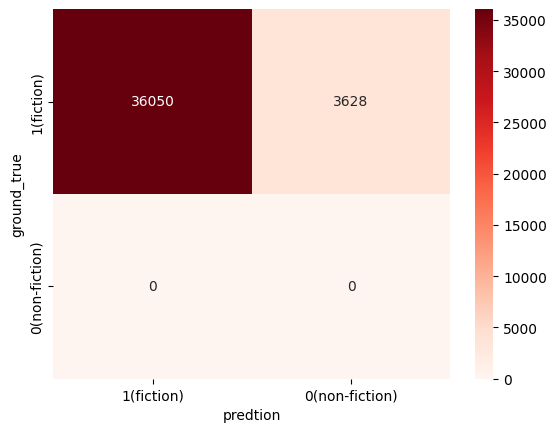

In [97]:
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('predtion')
plt.ylabel('ground_true')
plt.xticks([0.5,1.5],['1(fiction)', '0(non-fiction)'])
plt.yticks([0.5,1.5],['1(fiction)', '0(non-fiction)'])
plt.show()

In [81]:
36050/(36050 + 3628)

0.9085639397147034